In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_xtrain = pd.read_csv('Heart_train.csv')
df_xtest = pd.read_csv('Heart_test.csv')
X_train = df_xtrain.drop(columns = 'target') 
y_train = df_xtrain['target']
X_test = df_xtest.drop(columns = 'target') 
y_test = df_xtest['target']




In [3]:
df = pd.concat([df_xtrain, df_xtest])
print(df['target'].value_counts())
#this means 165 records with  having heart disease, 138 not having the disease

1    165
0    138
Name: target, dtype: int64


first i am checking if there are any null values in our dataset

In [4]:
# df.isnull().sum()

Secondly i am checking the ratios of affected vs non affected

In [5]:
df['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

In [6]:
df_tar_0 = df[df['target'] == 1]
x = ['men', 'women']
y = (93,72)
print(df_tar_0['sex'].value_counts())
#plt.bar(x,y)
#plt.title('Comparision Between Gender having Heart Disease')
#plt.xlabel('sex')
#plt.ylabel('Counts')
#df_tar_0


1    93
0    72
Name: sex, dtype: int64


Text(0.5, 1.0, 'Age Distribution on presence of Heart Disease')

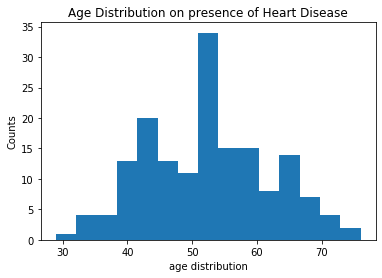

In [7]:
#y = [1,3,1,2,3]
#y = [2,3,4]
#plt.bar(df['age'], df['age'].value_counts())
#x = ['naresh', 'sharma', 'keshab']
plt.hist(df_tar_0['age'], bins=15, histtype='bar')
plt.xlabel('age distribution')
plt.ylabel('Counts')
plt.title('Age Distribution on presence of Heart Disease')
#df_tar_0['age'].value_counts()

In [8]:
#converting categorical data in binary form using one hot encoder
cat_columns = ['cp', 'exang', 'slope', 'thal']
num_columns = [c for c in X_train if c not in cat_columns]
print(num_columns)
#X_train[num_columns]


['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'ca']


In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[cat_columns])
encoded_category_train = encoder.transform(X_train[cat_columns])
columns_names = encoder.get_feature_names(input_features= cat_columns)
#print(columns_names)
encoded_category_train.todense()
encoded_category_train_ = pd.DataFrame(encoded_category_train.todense(), columns=columns_names, index=X_train.index)
encoded_category_train
final_Xtrain = pd.concat([X_train[num_columns], encoded_category_train_], axis=1)
#final_Xtrain


In [10]:
encoded_category_test = encoder.transform(X_test[cat_columns])
encoded_category_test_ = pd.DataFrame(encoded_category_test.todense(), columns=columns_names, index=X_test.index)
final_Xtest = pd.concat([X_test[num_columns], encoded_category_test_], axis=1)
#final_Xtest

preprocessing is done to convert categorical value to numerical value, we use one hot encoder for preprocessing()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [12]:
#training the model with default hyperparameter
model = SVC()
model.fit(final_Xtrain, y_train)
#in default c =1, kernel ='rbf'
pred_y = model.predict(final_Xtest)
print(metrics.classification_report(y_test, pred_y))


              precision    recall  f1-score   support

           0       0.69      0.39      0.50        28
           1       0.62      0.85      0.72        33

    accuracy                           0.64        61
   macro avg       0.65      0.62      0.61        61
weighted avg       0.65      0.64      0.62        61



In [13]:
many_class_hyper = [

    (SVC,
     {
        'kernel':('linear', 'rbf'), 'C': (1,10,5)
     }
    ),


    (DecisionTreeClassifier,
     {
        'max_depth': (2,3,5,8,6,4),
         'min_samples_leaf' : (12, 8, 2,14) #5% of 242
     }
    ), 



    (RandomForestClassifier ,
     {
        'n_estimators': (10,50,100), 
        'max_features': (1,0.5,0.8, 0.1),
        'min_samples_leaf': (12,1,5,8)
    }
    ),
    
      (ExtraTreesClassifier ,
     {
        'n_estimators': (10,50,100), #should use high number, it is the number of decision tree
        'max_features': (1,0.5,0.8, 0.1),
        'min_samples_leaf': (12,1,5,8)
    }
    ),

    (AdaBoostClassifier,
     {
        'n_estimators':(5,10,20,30),
         'learning_rate': (0.5,0.1,0.001,0.0001)
     }
    ),


    (GradientBoostingClassifier,
     {
        'n_estimators': (10,20,40,45),
        'learning_rate': (0.05,0.1, 0.01, 0.2, 0.5),
        'min_samples_split': (2,3,5)
    }
    )

    ]

In [14]:
from sklearn.metrics import f1_score
def grid_search(classifier, param, final_Xtrain, y_train, final_Xtest, y_test ):    
    clf = GridSearchCV(classifier(random_state = 1), param)
    clf.fit(final_Xtrain, y_train)
    #i want to see all the validation report how c = 1 and kernel rbf selected
    #here i am little confused how best score works
    #without best score c:1 and kernel:linear was coming
    print(clf.best_score_ , clf.best_params_)
    best = clf.best_estimator_
    #clf best estimator again trains the model in best hyperparameter
    test_pred = best.predict(final_Xtest)
    return accuracy_score(y_test, test_pred)
    
    #print(metrics.classification_report(y_test, test_pred))
    #it is giving c:1 and kernel:linear (means margin is more.), as c value increase margin decrease  
    #i want prove of how when c = 1 then training accuracy decrease and when c =10 training accuracy increase 
    #print(mac(y_test,test_pred ))
    #print(f1_score(y_test, test_pred, average='macro'))
